## TEQUILA SHOTS

In [65]:
import sys, os

from pipeline import load

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import lightkurve as lk
from lightkurve import MPLSTYLE

import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

plt.style.use(MPLSTYLE)

In [66]:
coord = SkyCoord.from_name('NGC 4395')

### Load pipeline result

Files in object directory /home/colinjb2/tequila_shots_binder/output/J122548.86+333248.69:
lc_target_diff.fits
lc_star_diff.fits
lightcurve_panel_diff_s22.png
tpfdiff_s22.fits
summary.txt
quick_look.png
diagnostic.pdf
tpf_diff_s22.fits


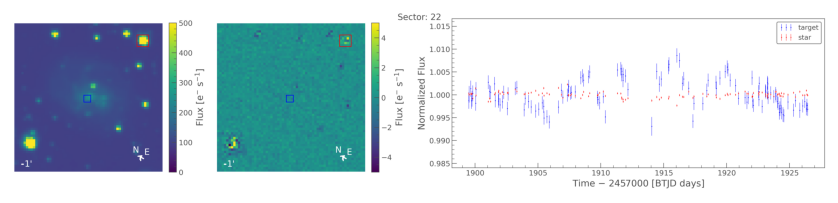

Done loading.


/home/colinjb2/.local/lib/python3.6/site-packages/lightkurve/targetpixelfile.py:1779: LightkurveWarning: A Kepler data product is being opened using the `TessTargetPixelFile` class. Please use `KeplerTargetPixelFile` instead.
  LightkurveWarning)


In [89]:
out = load(coord, diffim=True, out_dir='output')

### Access TPF and light curves

In [90]:
out.keys()

dict_keys(['lc_target', 'lc_target_bkg', 'lc_star', 'aper_target_list', 'aper_star_list', 'ref_flux_list', 'tpf_list', 'tpf_diff_list', 'coord_dir', 'wcs_ref'])

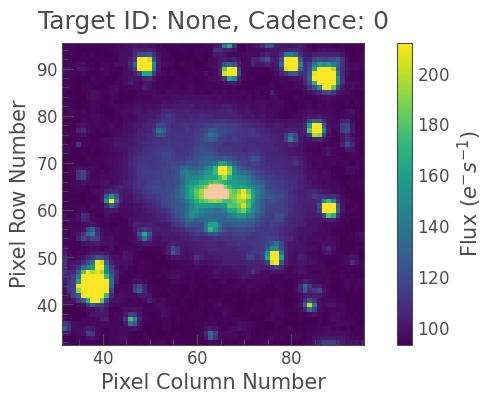

In [91]:
tpf = out['tpf_list'][0]
# Make threshold aperture
aper = tpf.create_threshold_mask(threshold=20)
# plot
tpf.plot(aperture_mask=aper)

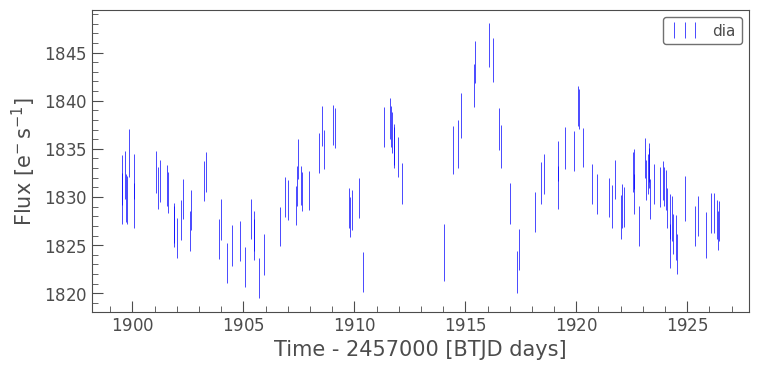

In [94]:
lc = tpf.to_lightcurve(aperture_mask=aper)
lc -= tpf.get_bkg_lightcurve(aperture_mask=aper)
lc.errorbar(color='blue');